<a href="https://colab.research.google.com/github/pranit06/ML/blob/master/Phoneme(remedial_assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Created wheel for all-in-one-ml: filename=all_in_one_ml-0.0.3-cp36-none-any.whl size=3868 sha256=a42ca7536e4a43a7587e125b7ed23afceebafa96dec933e729da8d150ae603cd
  Stored in directory: /root/.cache/pip/wheels/26/4f/f4/d595e3f4e73e8a49c62b9e2e99856618444f8d4c938d9c1b28
Successfully built all-in-one-ml


In [ ]:
from all_in_one_ml import beginner
import sklearn 

In [ ]:
from sklearn import datasets


In [ ]:
data = datasets.fetch_openml('phoneme')


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)


In [ ]:
df.head()

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127


In [ ]:
df['class'] = data.target

In [ ]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
x_hot,y_hot = beginner.one_hot(x,y,cat='~')
print(x_hot,y_hot)

      V1_-2.933743  V1_-2.811423  ...  V5_4.296162  V5_4.586666
0                0             0  ...            0            0
1                0             0  ...            0            0
2                0             0  ...            0            0
3                0             0  ...            0            0
4                0             0  ...            0            0
...            ...           ...  ...          ...          ...
5399             0             0  ...            0            0
5400             0             0  ...            0            0
5401             0             0  ...            0            0
5402             0             0  ...            0            0
5403             0             0  ...            0            0

[5404 rows x 25791 columns]       1  2
0     1  0
1     1  0
2     1  0
3     1  0
4     1  0
...  .. ..
5399  1  0
5400  0  1
5401  0  1
5402  1  0
5403  0  1

[5404 rows x 2 columns]


In [ ]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x_hot,y_hot,0.2,8)

(4323, 25791) (4323, 2) (1081, 25791) (1081, 2)


In [ ]:
x_train.head()

,V1_-2.933743,V1_-2.811423,V1_-2.17234,V1_-2.169755,V1_-2.110076,V1_-2.097106,V1_-2.078774,V1_-1.986639,V1_-1.920272,V1_-1.919518,V1_-1.887051,V1_-1.886623,V1_-1.867002,V1_-1.782319,V1_-1.731297,V1_-1.705078,V1_-1.689673,V1_-1.640643,V1_-1.598739,V1_-1.563204,V1_-1.541168,V1_-1.449351,V1_-1.449248,V1_-1.401966,V1_-1.376619,V1_-1.330113,V1_-1.327671,V1_-1.326546,V1_-1.325132,V1_-1.321206,V1_-1.319029,V1_-1.313993,V1_-1.310934,V1_-1.288638,V1_-1.266229,V1_-1.263068,V1_-1.256178,V1_-1.254864,V1_-1.246343,V1_-1.241864,...,V5_3.290344,V5_3.293471,V5_3.294044,V5_3.298196,V5_3.310965,V5_3.33586,V5_3.359556,V5_3.364768,V5_3.365271,V5_3.374844,V5_3.412785,V5_3.413202,V5_3.422358,V5_3.430001,V5_3.456286,V5_3.489033,V5_3.52218,V5_3.532691,V5_3.534445,V5_3.538806,V5_3.54023,V5_3.554632,V5_3.560799,V5_3.563753,V5_3.574489,V5_3.576713,V5_3.583523,V5_3.597125,V5_3.790847,V5_3.812945,V5_3.834643,V5_3.872411,V5_3.89192,V5_3.92366,V5_3.985315,V5_3.992785,V5_4.033246,V5_4.22589,V5_4.296162,V5_4.586666
1353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,1,2
1353,1,0
2805,1,0
3403,0,1
4456,1,0
2522,1,0


In [ ]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2579200   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 2,599,602
Trainable params: 2,599,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
109/109 [==============================] - 2s 23ms/step - loss: 0.6194 - accuracy: 0.6978 - val_loss: 0.6002 - val_accuracy: 0.7098
Epoch 2/30
109/109 [==============================] - 2s 21ms/step - loss: 0.1462 - accuracy: 0.9219 

In [ ]:
beginner.get_accuracy(x_test,y_test,model)

34/34 [==============================] - 0s 8ms/step - loss: 1.0913 - accuracy: 0.4024


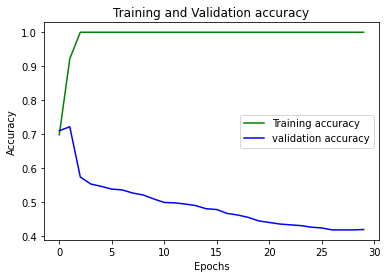

In [ ]:
beginner.accuracy_vs_valaccuracy(model,history,30)

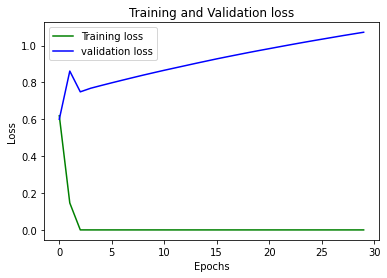

In [ ]:
beginner.loss_vs_valloss(model,history,30)